## Handwritten Digits Classification using TenorFlow
This Jupyter Notebook explores different approaches to classify handwritten digits (0-9) from the MNIST dataset using TensorFlow.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

5


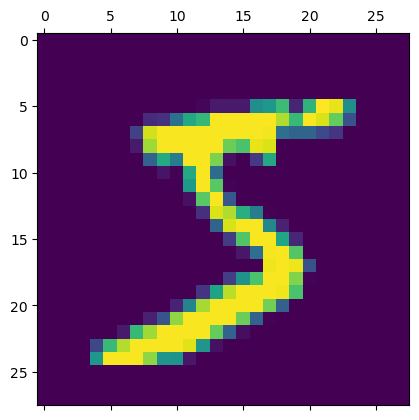

In [4]:
print(y_train[0])
plt.matshow(X_train[0])

In [5]:
#Scaling
#Without scaling accuracy: 88.77

X_train = X_train/255
X_test = X_test/255

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [8]:
X_test_flattened.shape

(10000, 784)

### Single Layered

In [9]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 8s 3ms/step - loss: 0.4720 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3040 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2837 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2735 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2670 - accuracy: 0.9254


In [10]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.9258


[0.2656135559082031, 0.9258000254631042]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

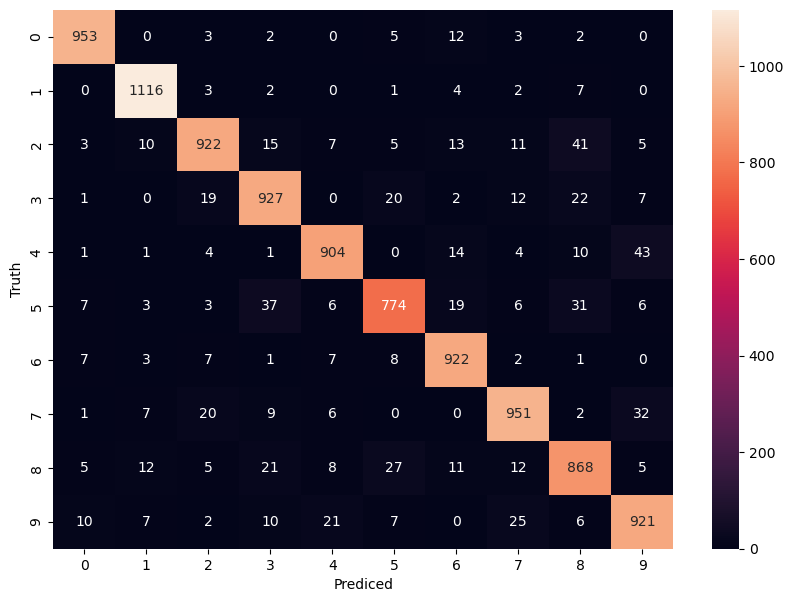

In [11]:
import seaborn as sns
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediced')
plt.ylabel('Truth')

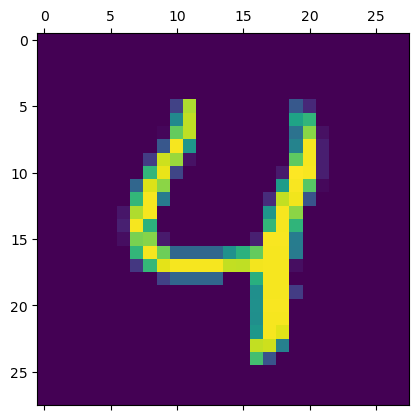

313/313 [==============================] - 1s 3ms/step
[3.3457167e-02 4.4846747e-05 1.4781404e-01 4.1420893e-03 9.8233199e-01
 8.8472180e-03 1.6637027e-01 1.7523068e-01 2.4500369e-01 6.6364890e-01]
The predicted number is: 4


In [12]:
plt.matshow(X_test[4])
plt.show()

y_predicted = model.predict(X_test_flattened)
print(y_predicted[4])

print(f'The predicted number is: {np.argmax(y_predicted[4])}')

### Hidden Layers

In [13]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2687 - accuracy: 0.9243
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1204 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0840 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0644 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0512 - accuracy: 0.9846


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0858 - accuracy: 0.9726


[0.08581146597862244, 0.972599983215332]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

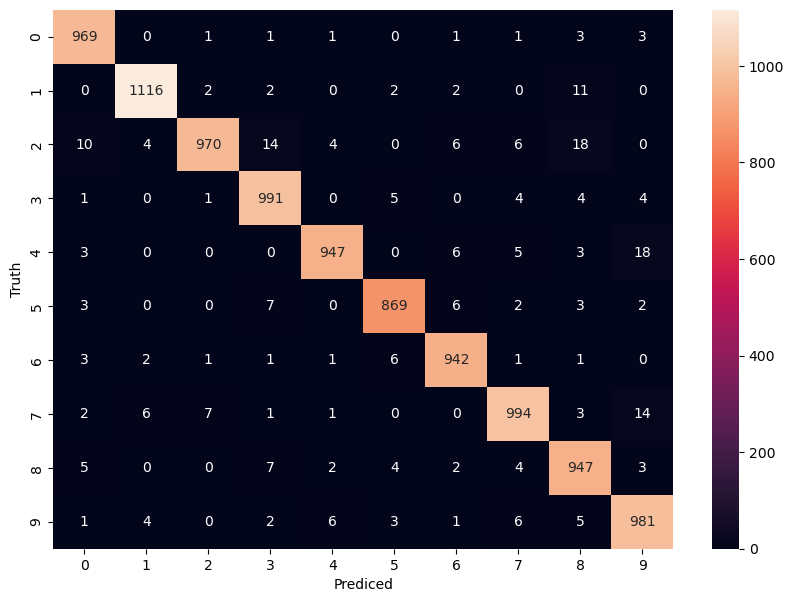

In [15]:
import seaborn as sns
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediced')
plt.ylabel('Truth')

### By using flatten function of TensorFlow

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2749 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1240 - accuracy: 0.9637
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0862 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0660 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0528 - accuracy: 0.9841


313/313 [==============================] - 2s 4ms/step - loss: 0.0851 - accuracy: 0.9737
[0.08507803082466125, 0.9736999869346619]
313/313 [==============================] - 1s 4ms/step


Text(95.72222222222221, 0.5, 'Truth')

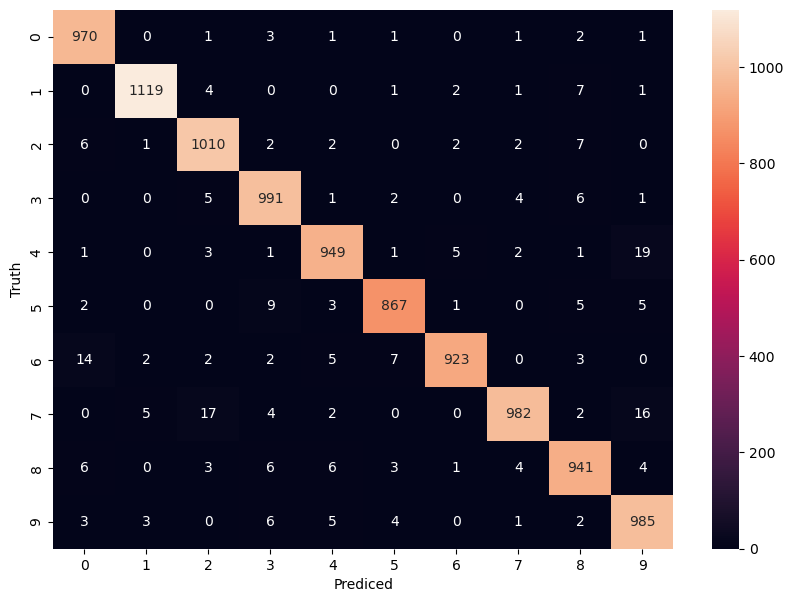

In [17]:
import seaborn as sns

print(model.evaluate(X_test, y_test))

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediced')
plt.ylabel('Truth')